# Enhanced Lab04: K-Means 

# 1. Clarifying Concepts

## 1.1 The Elbow Method and WCSS (Within-Cluster Sum of Squares)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc, 0.5, size=(100, 2)) for loc in [(2, 2), (8, 8), (5, 5), (1, 10)]
])

In [ ]:
# Calculate WCSS for different k values
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

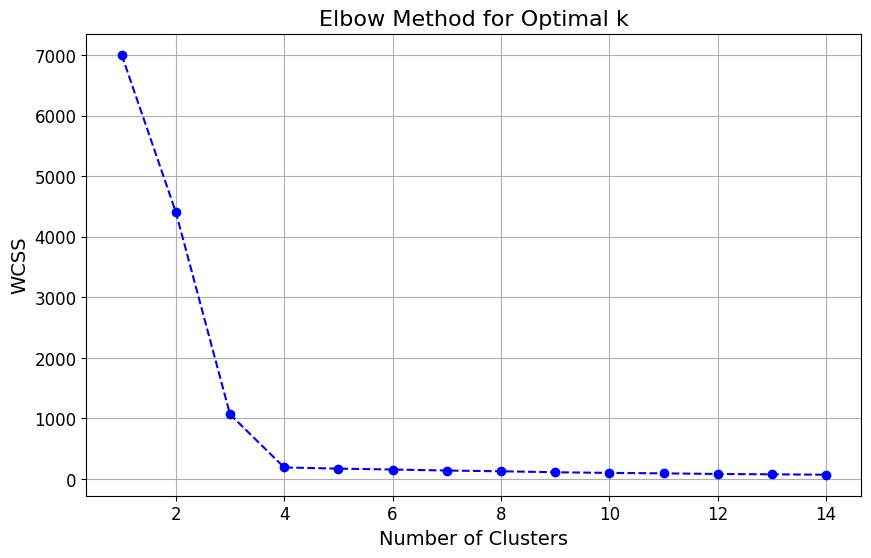

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


## 1.2 K-Means++ Initialization

In [ ]:
# Visualizing Random Initialization vs K-Means++
def random_initialization(data, n_clusters):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    return centroids

def kmeans_plus_plus_initialization(data, n_clusters):
    np.random.seed(42)
    centroids = [data[np.random.randint(data.shape[0])]]
    while len(centroids) < n_clusters:
        distances = np.min(
            np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1
        )
        probabilities = distances / distances.sum()
        next_centroid = data[np.random.choice(data.shape[0], p=probabilities)]
        centroids.append(next_centroid)
    return np.array(centroids)


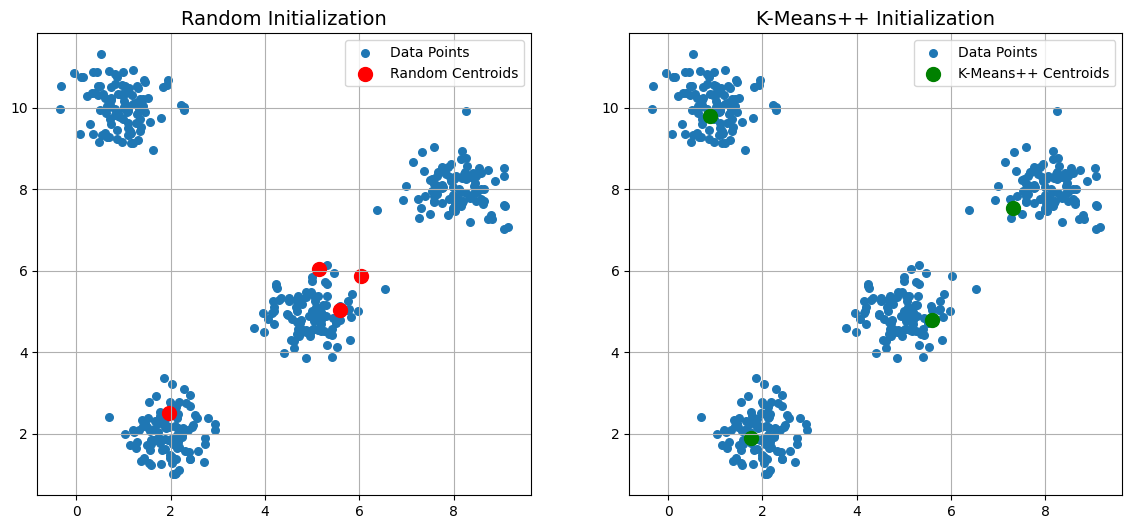

In [ ]:
# Comparing Initializations
random_centroids = random_initialization(data, 4)
kmeans_pp_centroids = kmeans_plus_plus_initialization(data, 4)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=30, label='Data Points')
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', label='Random Centroids', s=100)
plt.title('Random Initialization', fontsize=14)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], s=30, label='Data Points')
plt.scatter(kmeans_pp_centroids[:, 0], kmeans_pp_centroids[:, 1], color='green', label='K-Means++ Centroids', s=100)
plt.title('K-Means++ Initialization', fontsize=14)
plt.legend()
plt.grid(True)

plt.show()

## 1.3 Theory: K-Means Overview

### K-Means Theory

**Convergence Criteria:**
1. Assign each point to the nearest centroid.
2. Recompute centroids as the mean of assigned points.
3. Repeat until centroid positions stabilize or maximum iterations reached.

**Complexity:** O(n * k * d * i), where n = samples, k = clusters, d = dimensions, i = iterations.

# 2. Advanced Concepts

## 2.1 Limitations of K-Means

### Limitations of K-Means

1. Sensitive to initial centroids.
2. Assumes spherical clusters.
3. Poor performance with high-dimensional or categorical data.

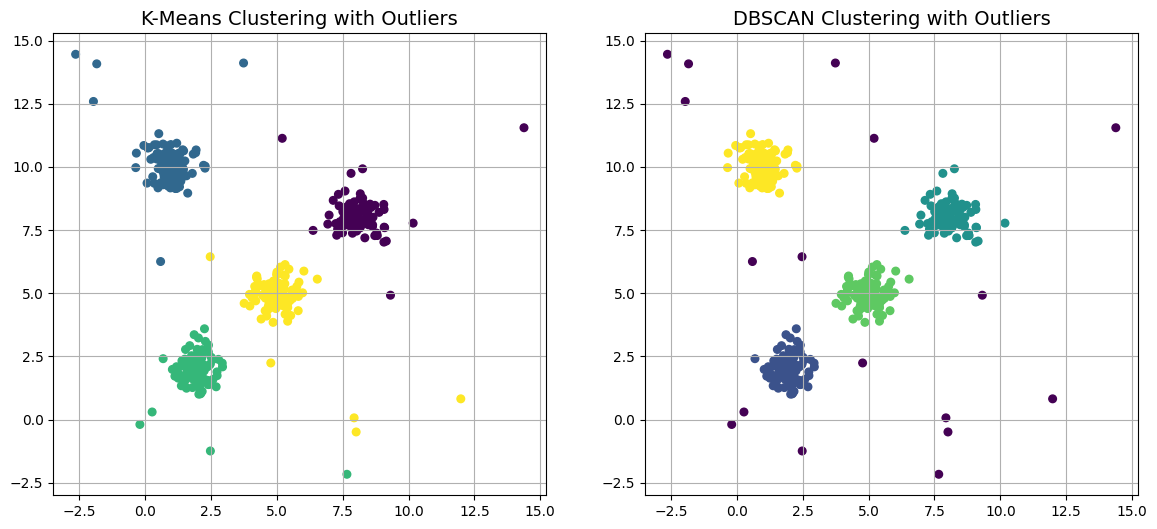

In [ ]:
# Handling Outliers with Robust K-Means
from sklearn.cluster import DBSCAN

def plot_outliers_effect(data):
    np.random.seed(42)
    noisy_data = np.vstack([
        data,
        np.random.uniform(-3, 15, size=(20, 2))  # Adding outliers
    ])

    kmeans = KMeans(n_clusters=4, random_state=42)
    dbscan = DBSCAN(eps=1.2, min_samples=5)

    kmeans_labels = kmeans.fit_predict(noisy_data)
    dbscan_labels = dbscan.fit_predict(noisy_data)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(noisy_data[:, 0], noisy_data[:, 1], c=kmeans_labels, cmap='viridis', s=30)
    plt.title('K-Means Clustering with Outliers', fontsize=14)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(noisy_data[:, 0], noisy_data[:, 1], c=dbscan_labels, cmap='viridis', s=30)
    plt.title('DBSCAN Clustering with Outliers', fontsize=14)
    plt.grid(True)

    plt.show()

plot_outliers_effect(data)

## 2.2 Comparison: Gaussian Mixture Models (GMM) and  Hierarchical Clustering

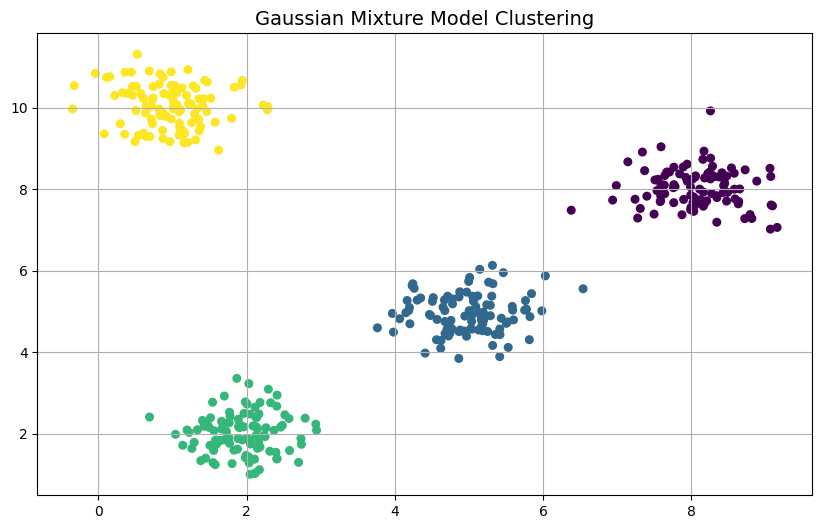

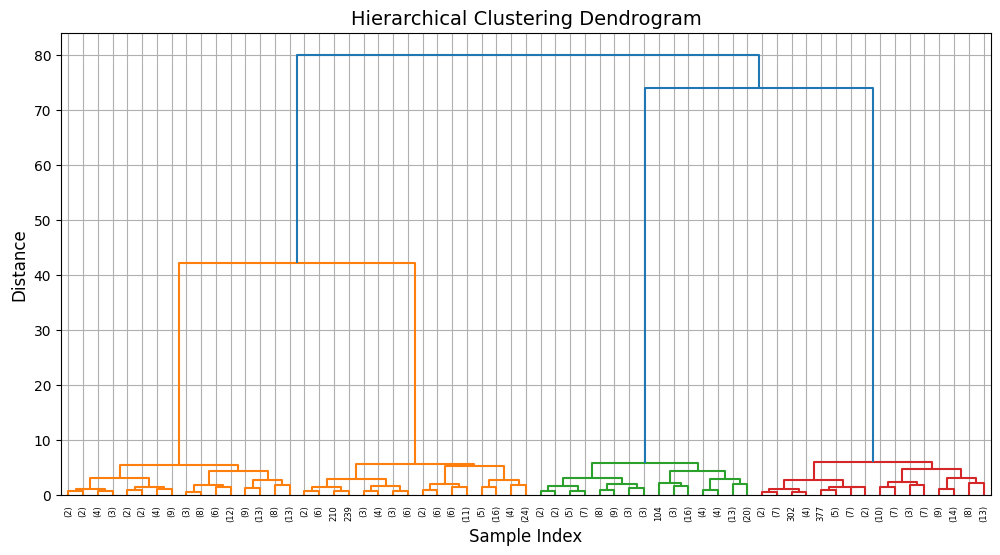

In [ ]:
# Compare with advanced clustering methods
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

# GMM Clustering
plt.figure(figsize=(10, 6))
gmm = GaussianMixture(n_components=4, random_state=42).fit(data)
gmm_labels = gmm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', s=30)
plt.title('Gaussian Mixture Model Clustering', fontsize=14)
plt.grid(True)
plt.show()

# Hierarchical Clustering
linkage_matrix = linkage(data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True)
plt.show()

# **3. Visualizations**

### To enhance understanding of K-Means clustering, several visualization techniques are introduced in this section. These visualizations help explain how data points are grouped and how centroids evolve during the clustering process.

## **3.1 Visualizing the Dataset**

###Before applying the K-Means algorithm, visualizing the dataset provides insight into its structure and potential clustering.

<ipython-input-24-5fccb8aab080>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Feature 1', y='Feature 2', data=df, s=50, palette='viridis')


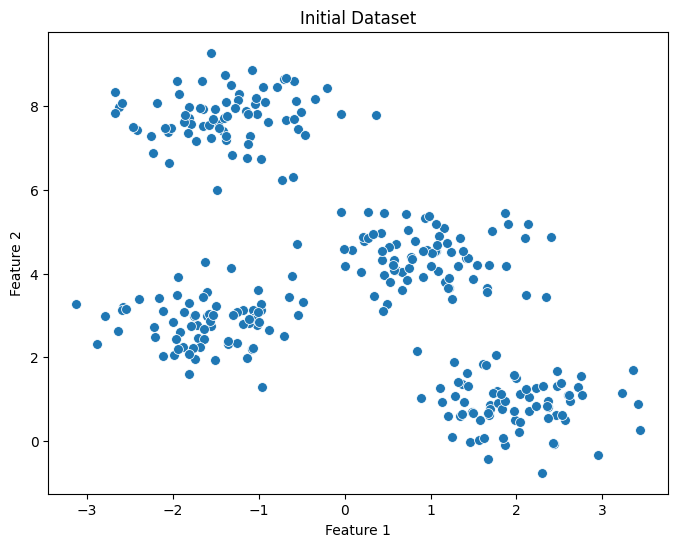

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs

# Generate synthetic dataset for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Scatter plot of the dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', data=df, s=50, palette='viridis')
plt.title('Initial Dataset')
plt.show()

## **3.2 Visualizing the Clustering Process**

###Here, we visualize the clustering process, including the assignment of data points to clusters and the movement of centroids over iterations.

#### **3.2.1 Initial Centroids and Data Assignment**


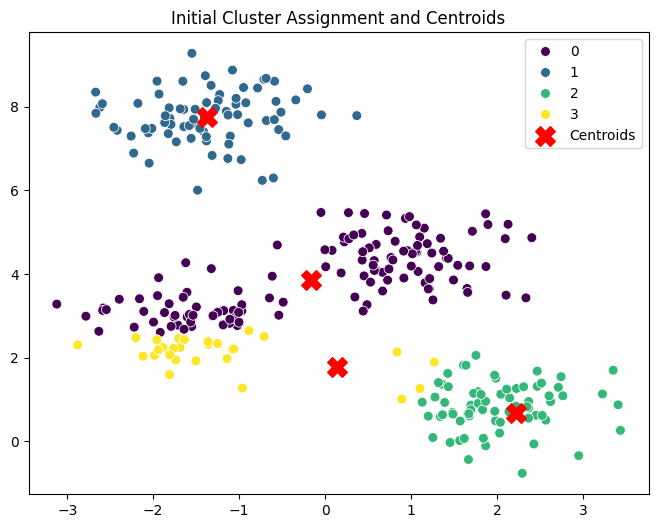

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=0)
kmeans.fit(X)

# Initial cluster assignment and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot initial clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Initial Cluster Assignment and Centroids')
plt.legend()
plt.show()

#### **3.2.2 Iterative Updates of Centroids**

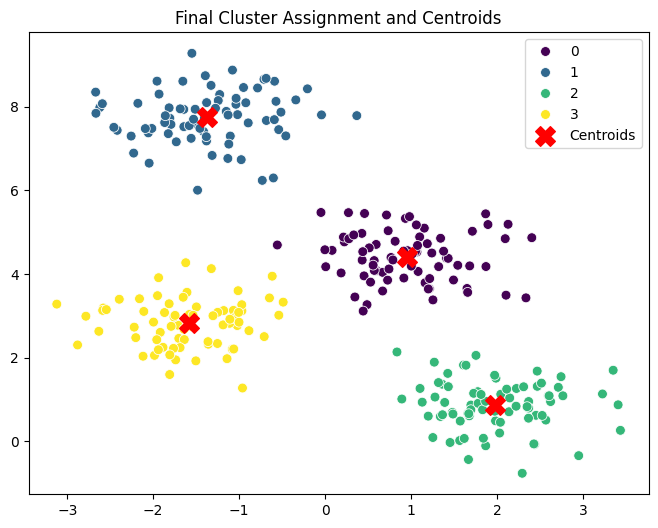

In [ ]:
# Perform multiple iterations of KMeans
kmeans = KMeans(n_clusters=4, init='random', max_iter=5, random_state=0)
kmeans.fit(X)

# Extract labels and centroids after clustering
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot final clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Final Cluster Assignment and Centroids')
plt.legend()
plt.show()

### **3.3 Cluster Quality Assessment**

###We assess the quality of the clusters using the elbow method, which plots the within-cluster sum of squares (WCSS) for different numbers of clusters.

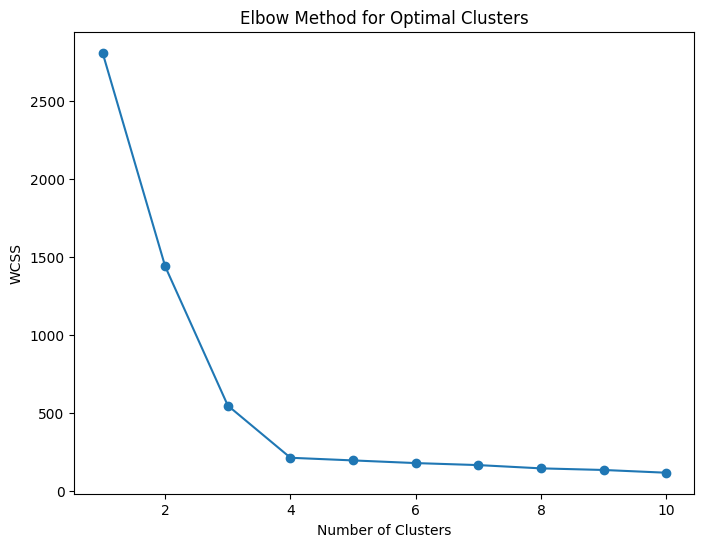

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **3.4 Visualizing Real-World Applications**

#### **3.4.1 Iris Dataset**

Using the Iris dataset, we demonstrate clustering and visualize the results in two dimensions.

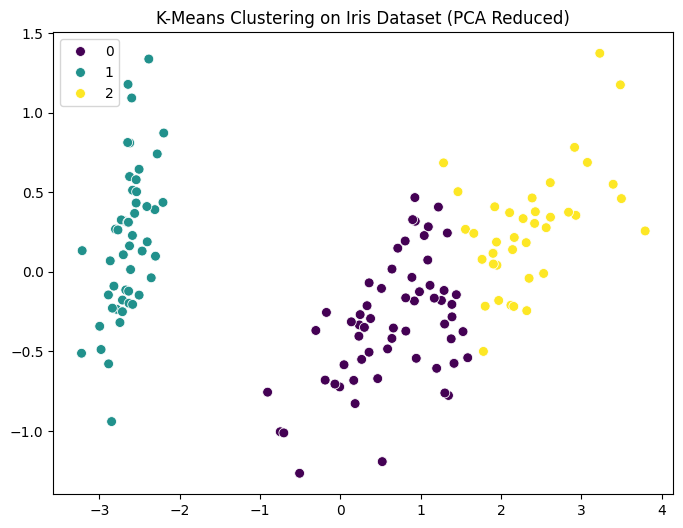

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.show()

#### **3.4.2 Geolocation Data**

Clustering geolocations using K-Means.

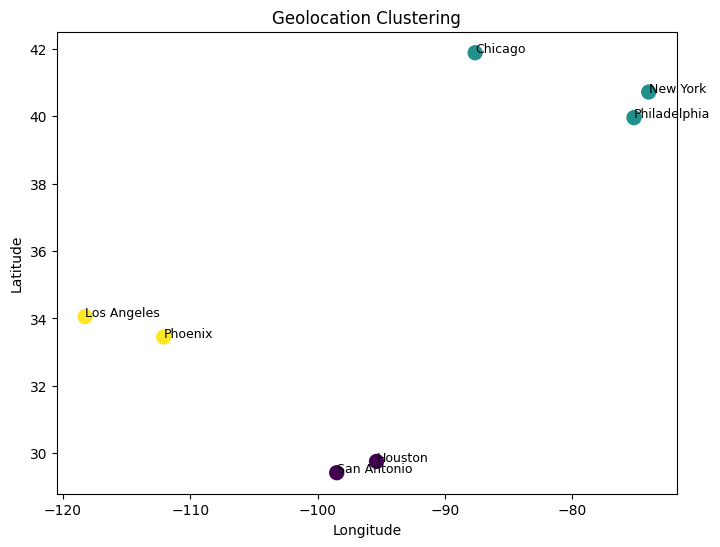

In [ ]:
geolocation_data = pd.DataFrame({
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio'],
    'Latitude': [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 39.9526, 29.4241],
    'Longitude': [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -75.1652, -98.4936]
})

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(geolocation_data[['Latitude', 'Longitude']])

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(geolocation_data['Longitude'], geolocation_data['Latitude'], c=labels, cmap='viridis', s=100)
plt.title('Geolocation Clustering')
for i, city in enumerate(geolocation_data['City']):
    plt.text(geolocation_data['Longitude'][i], geolocation_data['Latitude'][i], city, fontsize=9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()